In [160]:
import pickle
import xgboost as xgb

In [175]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.datasets import load_iris, load_digits, load_boston

In [162]:
rng = np.random.RandomState(31337)

In [163]:
# print("Iris: multiclass classification")
# iris = load_iris()
# y = iris['target']
# X = iris['data']
# kf = KFold(n_splits=2, shuffle=True, random_state=rng)
# for train_index, test_index in kf.split(X):
#     xgb_model = xgb.XGBClassifier().fit(X[train_index], y[train_index])
#     predictions = xgb_model.predict(X[test_index])
#     actuals = y[test_index]
#     print(confusion_matrix(actuals, predictions))

In [164]:
import pandas as pd

In [165]:
dengue2013 = pd.read_csv("../Dengue/dengueCases2013.csv")

In [166]:
dengue2013 = dengue2013.sort_values('moh_id')

In [167]:
# deng2013npX = np.stack([dengue2013['1'],dengue2013['2'],dengue2013['3'],dengue2013['4']]).T
# deng2013npY = np.stack([dengue2013['5']]).T
# for i in range(2,49):
#     temp1 = np.stack([dengue2013[str(i+4)]])
#     temp2 = np.stack([dengue2013[str(i)],dengue2013[str(i+1)],dengue2013[str(i+2)],dengue2013[str(i+3)]])
#     deng2013npY = np.concatenate((deng2013npY,temp1.T))
#     deng2013npX = np.concatenate((deng2013npX,temp2.T))

In [168]:
deng2013npX = np.stack([dengue2013['1'],dengue2013['2'],dengue2013['3']]).T
deng2013npY = np.stack([dengue2013['4']]).T
for i in range(2,50):
    temp1 = np.stack([dengue2013[str(i+3)]])
    temp2 = np.stack([dengue2013[str(i)],dengue2013[str(i+1)],dengue2013[str(i+2)]])
    deng2013npY = np.concatenate((deng2013npY,temp1.T))
    deng2013npX = np.concatenate((deng2013npX,temp2.T))


In [169]:
# deng2013npX = np.stack([dengue2013['1'],dengue2013['2']]).T
# deng2013npY = np.stack([dengue2013['3']]).T
# for i in range(2,51):
#     temp1 = np.stack([dengue2013[str(i+2)]])
#     temp2 = np.stack([dengue2013[str(i)],dengue2013[str(i+1)]])
#     deng2013npY = np.concatenate((deng2013npY,temp1.T))
#     deng2013npX = np.concatenate((deng2013npX,temp2.T))

In [170]:
X_train, X_test, y_train, y_test = train_test_split(deng2013npX, deng2013npY, test_size=0.33, random_state=rng)

In [190]:
xgb_model = xgb.XGBRegressor().fit(X_train, y_train)
predictions = xgb_model.predict(X_test)
actuals = y_test
print(mean_squared_error(actuals, np.rint(predictions)))
print(r2_score(actuals,np.rint(predictions)))

10.371807182638756
0.7468842925999254


In [177]:
dengue2014 = pd.read_csv("../Dengue/dengueCases2014.csv")
dengue2014 = dengue2014.sort_values('moh_id')

In [178]:
deng2014npX = np.stack([dengue2014['1'],dengue2014['2'],dengue2014['3']]).T
deng2014npY = np.stack([dengue2014['4']]).T
for i in range(2,50):
    temp3 = np.stack([dengue2014[str(i+3)]])
    temp4 = np.stack([dengue2014[str(i)],dengue2014[str(i+1)],dengue2014[str(i+2)]])
    deng2014npY = np.concatenate((deng2014npY,temp3.T))
    deng2014npX = np.concatenate((deng2014npX,temp4.T))

In [276]:
predictions14 = xgb_model.predict(deng2014npX)
actuals14 = deng2014npY
print(sqrt(mean_squared_error(actuals14, predictions14)))
print(r2_score(actuals14,predictions14))

4.28354528212886
0.6555041402916186


In [183]:
from math import sqrt
print(sqrt(mean_squared_error(actuals14, np.rint(predictions14))))

4.292578058833361


In [191]:
deng14and13X = np.concatenate((deng2013npX,deng2014npX))
deng14and13Y = np.concatenate((deng2013npY,deng2014npY))

In [192]:
X_train, X_test, y_train, y_test = train_test_split(deng14and13X, deng14and13Y, test_size=0.33, random_state=rng)

In [193]:
xgb1314_model = xgb.XGBRegressor().fit(X_train, y_train)
predictions = xgb1314_model.predict(X_test)
actuals = y_test
print(mean_squared_error(actuals, np.rint(predictions)))
print(r2_score(actuals,np.rint(predictions)))

11.867486076435567
0.7473376881835622


In [212]:
def pdtonumpy(pdset):
    X = np.stack([pdset['1'],pdset['2'],pdset['3']]).T
    y = np.stack([pdset['4']]).T
    for i in range(2,50):
        tempY = np.stack([pdset[str(i+3)]])
        tempX = np.stack([pdset[str(i)],pdset[str(i+1)],pdset[str(i+2)]])
        y = np.concatenate((y,tempY.T))
        X = np.concatenate((X,tempX.T))
    return X,y

In [255]:
def rowtonumpy(row):
    X = np.stack([[row['1'],row['2'],row['3']]])
    y = np.stack([row['4']])
    for i in range(2,50):
        tempRY = np.stack([row[str(i+3)]])
        tempRX = np.stack([[row[str(i)],row[str(i+1)],row[str(i+2)]]])
        y = np.concatenate((y,tempRY))
        X = np.concatenate((X,tempRX))
    return X,y

In [216]:
panadura13 = dengue2013.loc[dengue2013.moh=='Panadura']
panadura13X,panadura13y = pdtonumpy(panadura13)
predictions13panadura = xgb_model.predict(panadura13X)
actuals13panadura = panadura13y
print(mean_squared_error(actuals13panadura, predictions13panadura))
print(r2_score(actuals13panadura,predictions13panadura))

48.17360670519514
0.1408688279048239


In [256]:
def calcErrorForMOH(pdset,model):
    # Creating an empty Dataframe with column names only
    results = pd.DataFrame(columns=['MOH', 'MSE', 'R2'])
    for index, row in pdset.iterrows():
        X,y = rowtonumpy(row)
        predictionsMOH = xgb_model.predict(X)
        actualsMOH = y
        mse = mean_squared_error(actualsMOH, predictionsMOH)
        r2 = r2_score(actualsMOH,predictionsMOH)
        results = results.append({"MOH":row['moh'],'MSE': mse, 'R2': r2}, ignore_index=True)
    return results

In [257]:
results = calcErrorForMOH(dengue2014,xgb_model)
# for index, row in dengue2013.iterrows():
#         print(row['moh']+"sdf")

(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)
(49, 3)


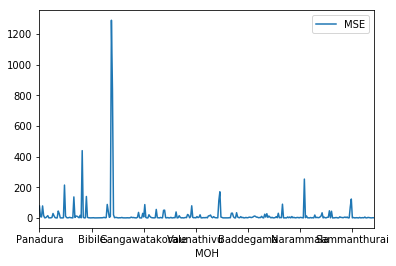

In [258]:
results.plot(x='MOH',y='MSE', kind='line')

In [260]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [268]:
plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
panadura14 = dengue2014.loc[dengue2014.moh=='Panadura']
panadura14X,panadura14y = pdtonumpy(panadura14)
predictions14panadura = xgb_model.predict(panadura14X)
actuals14panadura = panadura14y
print(mean_squared_error(actuals14panadura, predictions14panadura))
print(r2_score(actuals14panadura,predictions14panadura))

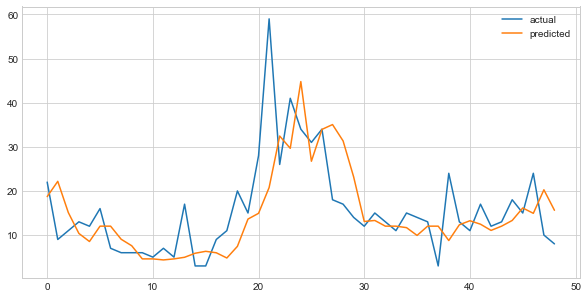

In [269]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(range(49), actuals14panadura,label='actual');
ax.plot(range(49), predictions14panadura,label='predicted')
ax.legend()


In [261]:
actuals14panadura.shape

(49, 1)

In [271]:
def plotForMOH(mohName):
    panadura14 = dengue2014.loc[dengue2014.moh==mohName]
    panadura14X,panadura14y = pdtonumpy(panadura14)
    predictions14panadura = xgb_model.predict(panadura14X)
    actuals14panadura = panadura14y
    print(mean_squared_error(actuals14panadura, predictions14panadura))
    print(r2_score(actuals14panadura,predictions14panadura))
    fig = plt.figure()
    ax = plt.axes()

    x = np.linspace(0, 10, 1000)
    ax.plot(range(49), actuals14panadura,label='actual');
    ax.plot(range(49), predictions14panadura,label='predicted')
    ax.legend()


8.294357388280273
0.14345152304254039


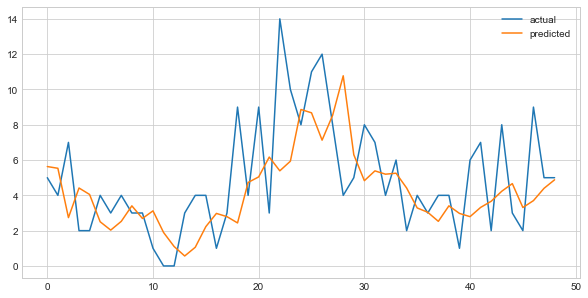

In [272]:
plotForMOH("Kalutara(North)")

77.85763101420926
0.2921229473450605


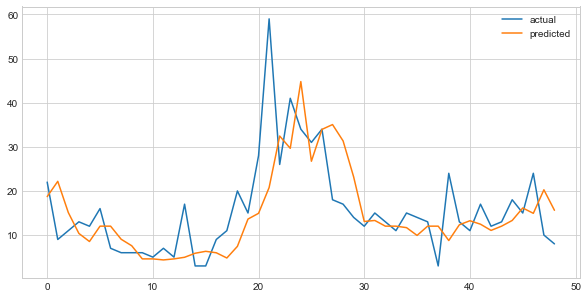

In [273]:
plotForMOH("Panadura")

,moh_id,moh,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
234,0,Panadura,10,33,14,22,9,11,13,12,...,11,17,12,13,18,15,24,10,8,823
116,1,Kalutara(North),10,11,0,5,4,7,2,2,...,6,7,2,8,3,2,9,5,5,261
30,2,Bandaragama,3,0,7,6,9,8,4,0,...,0,4,4,6,2,7,6,6,4,205
37,3,Biyagama,7,8,11,6,7,3,5,14,...,32,8,13,26,13,8,15,25,9,539
110,4,Kaduwela,27,13,14,20,16,3,1,6,...,6,5,14,2,5,10,4,13,6,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,317,Poonakari,1,2,0,0,0,1,0,1,...,0,0,3,1,1,1,1,0,2,22
261,318,Sainthamaruthu,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,9
245,319,Poojapitiya,0,3,0,0,0,0,1,0,...,0,2,2,1,3,0,4,2,5,45
215,320,Nintavur,0,0,0,0,0,2,1,2,...,4,2,1,2,4,3,4,1,0,49


6.460277439568852
0.007605493768086058


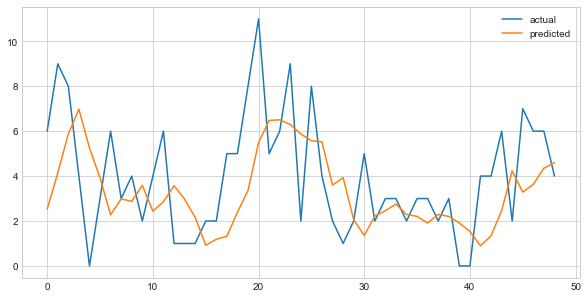

In [275]:
plotForMOH("Bandaragama")

253.5216356863326
0.2654942909098227


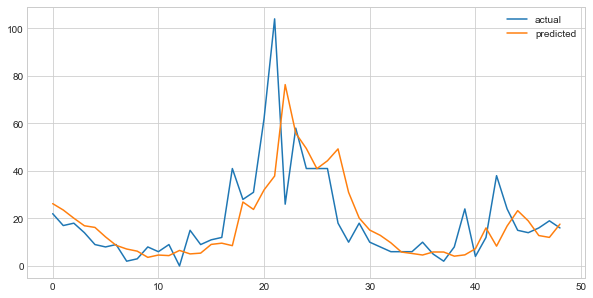

In [278]:
plotForMOH("Moratuwa")